#**Projetos de MLOPS**

###**Importing the required Python libraries and dataset:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
real_estate_data = pd.read_csv("/content/sao-paulo-properties.csv")

head_real_estate_data = real_estate_data.head()

info_real_estate_data = real_estate_data.info()

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(f"\nFirst rows of the dataset::")
display(head_real_estate_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             13640 non-null  int64  
 1   condo             13640 non-null  int64  
 2   size              13640 non-null  int64  
 3   rooms             13640 non-null  int64  
 4   toilets           13640 non-null  int64  
 5   suites            13640 non-null  int64  
 6   parking           13640 non-null  int64  
 7   elevator          13640 non-null  int64  
 8   furnished         13640 non-null  int64  
 9   swimming_pool     13640 non-null  int64  
 10  new               13640 non-null  int64  
 11  district          13640 non-null  object 
 12  negotiation_type  13640 non-null  object 
 13  property_type     13640 non-null  object 
 14  latitude          13640 non-null  float64
 15  longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,district,negotiation_type,property_type,latitude,longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


**Standardizing the DataFrame by making column names lowercase and replacing spaces with underscores.**

In [3]:
real_estate_data.columns = real_estate_data.columns.str.lower().str.replace(' ', '_')

string_columns = list(real_estate_data.dtypes[real_estate_data.dtypes == 'object'].index)

for col in string_columns:
    real_estate_data[col] = real_estate_data[col].str.lower().str.replace(' ', '_')

In [4]:
real_estate_data.head(5)

,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,district,negotiation_type,property_type,latitude,longitude
0,930,220,47,2,2,1,1,0,0,0,0,artur_alvim/são_paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,artur_alvim/são_paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,artur_alvim/são_paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,artur_alvim/são_paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,artur_alvim/são_paulo,rent,apartment,-23.525025,-46.482436


In [5]:
print(real_estate_data.isnull().sum())

price               0
condo               0
size                0
rooms               0
toilets             0
suites              0
parking             0
elevator            0
furnished           0
swimming_pool       0
new                 0
district            0
negotiation_type    0
property_type       0
latitude            0
longitude           0
dtype: int64


>Não há valores nulos no conjunto de dados.

In [6]:
descriptive_stats = real_estate_data.describe()

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(f"\nDescriptive statistics of the dataset:")
display(descriptive_stats)


Descriptive statistics of the dataset:


,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,latitude,longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


**Histograms of all numeric features in the dataset:**

In [7]:
from matplotlib.pyplot import tight_layout

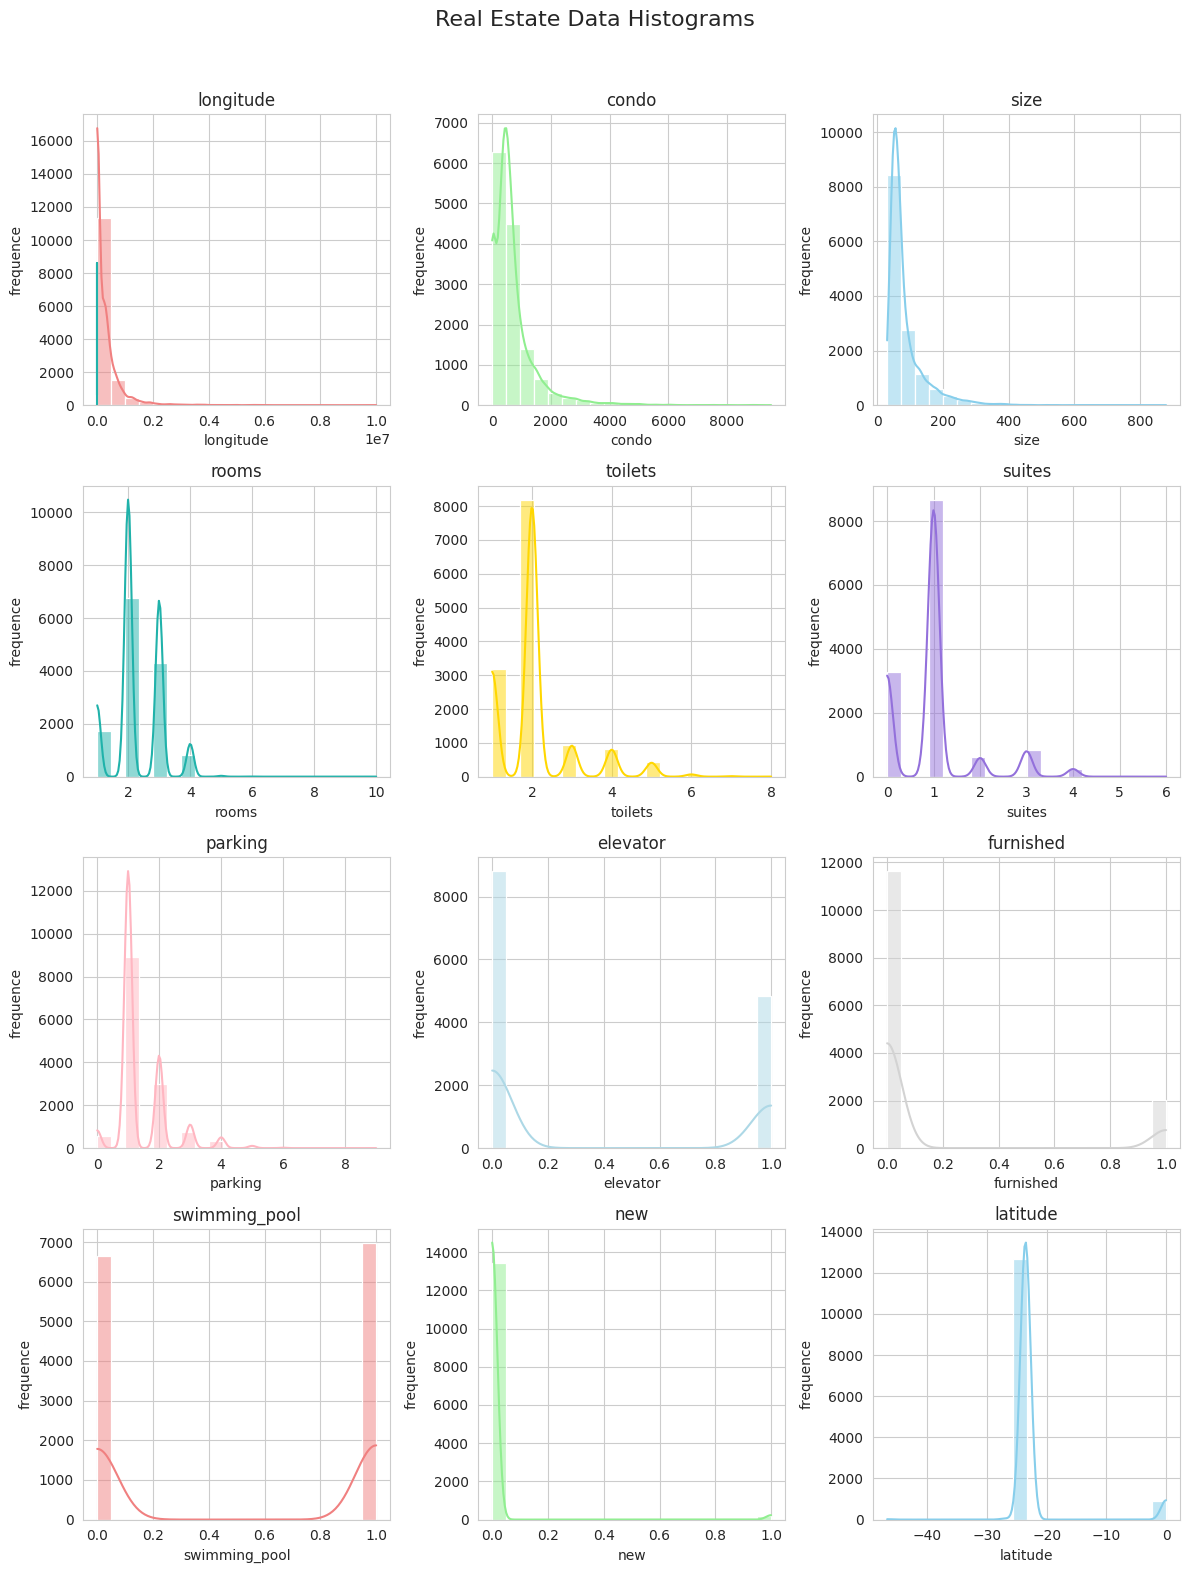

In [8]:
from matplotlib.pyplot import tight_layout

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 16))
fig.suptitle('Real Estate Data Histograms', fontsize=16)

numerical_columns = ['price', 'condo', 'size', 'rooms', 'toilets', 'suites', 'parking', 'elevator', 'furnished', 'swimming_pool', 'new', 'latitude', 'longitude']
colors = ['lightcoral', 'lightgreen', 'skyblue', 'lightseagreen', 'gold', 'mediumpurple', 'lightpink', 'lightblue', 'lightgrey']

def plot_histogram(ax, column, color):
    sns.histplot(real_estate_data[column], kde=True, ax=ax, color=color, bins=20)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('frequence')

for i, col in enumerate(numerical_columns):
    if col in real_estate_data.columns:
        row = i // 3 % axes.shape[0]
        col_index = i % 3 % axes.shape[1]
        plot_histogram(axes[row, col_index], col, colors[i % len(colors)])
    else:
        print(f"Column '{col}' not found in DataFrame.")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Scatter plots to investigate relationships between certain variables and apartment rental prices. Aiming to understand which factors may be exerting the most significant influence on real estate values.**

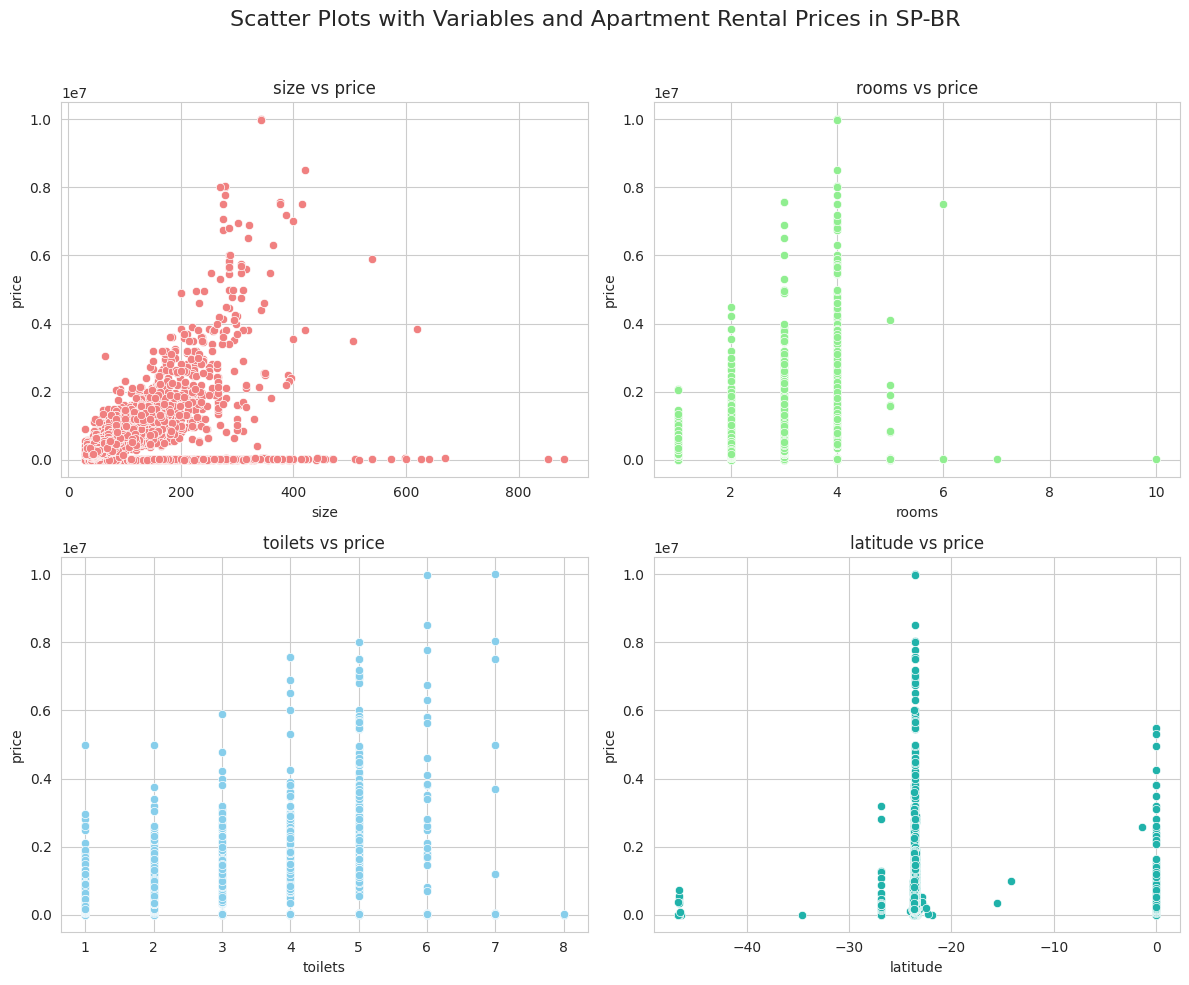

In [9]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with Variables and Apartment Rental Prices in SP-BR', fontsize=16)

scatter_variables = ['size', 'rooms', 'toilets', 'latitude']

colors = ['lightcoral', 'lightgreen', 'skyblue', 'lightseagreen']

for i, col in enumerate(scatter_variables):
    if col in real_estate_data.columns:
        sns.scatterplot(data=real_estate_data, x=col, y='price', ax=axes[i // 2, i % 2], color=colors[i])

        axes[i // 2, i % 2].set_title(f'{col} vs price')
        axes[i // 2, i % 2].set_xlabel(col)
        axes[i // 2, i % 2].set_ylabel('price')
    else:
        print(f"Column '{col}' not found in DataFrame.")

tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

**Correlation analysis to quantify the links between these variables, focusing especially on how each of them is correlated with the price of rents:**

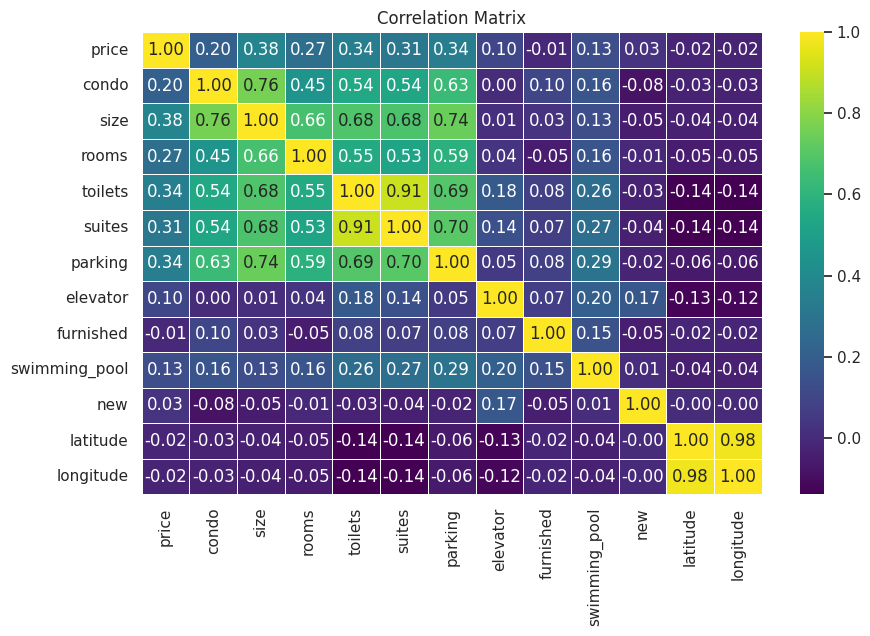


Correlation Matrix


,price,condo,size,rooms,toilets,suites,parking,elevator,furnished,swimming_pool,new,latitude,longitude
price,1.000000,0.203857,0.378450,0.272267,0.341887,0.313267,0.337959,0.102495,-0.006385,0.131494,0.033812,-0.021678,-0.024897
condo,0.203857,1.000000,0.761019,0.451355,0.543094,0.535896,0.632137,0.000779,0.101748,0.157123,-0.082479,-0.029288,-0.032258
size,0.378450,0.761019,1.000000,0.663280,0.684416,0.675828,0.741757,0.012513,0.033325,0.130841,-0.046182,-0.035356,-0.038486
rooms,0.272267,0.451355,0.663280,1.000000,0.554324,0.527250,0.589587,0.035810,-0.054274,0.161721,-0.010999,-0.049751,-0.051009
toilets,0.341887,0.543094,0.684416,0.554324,1.000000,0.910445,0.694664,0.178360,0.078729,0.263564,-0.028709,-0.135492,-0.137089
suites,0.313267,0.535896,0.675828,0.527250,0.910445,1.000000,0.704515,0.140794,0.072325,0.266896,-0.040307,-0.138138,-0.139654
parking,0.337959,0.632137,0.741757,0.589587,0.694664,0.704515,1.000000,0.053850,0.080594,0.293948,-0.024046,-0.060613,-0.062953
elevator,0.102495,0.000779,0.012513,0.035810,0.178360,0.140794,0.053850,1.000000,0.066680,0.204461,0.170077,-0.127179,-0.121063
furnished,-0.006385,0.101748,0.033325,-0.054274,0.078729,0.072325,0.080594,0.066680,1.000000,0.146984,-0.045555,-0.018098,-0.016798
swimming_pool,0.131494,0.157123,0.130841,0.161721,0.263564,0.266896,0.293948,0.204461,0.146984,1.000000,0.006989,-0.038082,-0.035105


In [11]:
numeric_data = real_estate_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print("\nCorrelation Matrix")
display(correlation_matrix)

## **Regression model to predict rental values ​​using the linear regression algorithm:**

In [12]:
print(real_estate_data.columns)

Index(['price', 'condo', 'size', 'rooms', 'toilets', 'suites', 'parking',
       'elevator', 'furnished', 'swimming_pool', 'new', 'district',
       'negotiation_type', 'property_type', 'latitude', 'longitude'],
      dtype='object')


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

selected_features = ['rooms', 'size', 'latitude',	'longitude']
target_variable = 'price'

X = real_estate_data[selected_features]
y = real_estate_data[target_variable]

test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

model = LinearRegression()

try:
    # Train model.
    model.fit(X_train, y_train)
    print("Successful model training!")

    # Test model.
    y_pred = model.predict(X_test)

    # Evaluating the model.
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
    print("\n")

except Exception as e:
    print(f"Error during model training: {str(e)}")

Successful model training!
Mean Squared Error: 286031187666.46
R-squared: 0.16




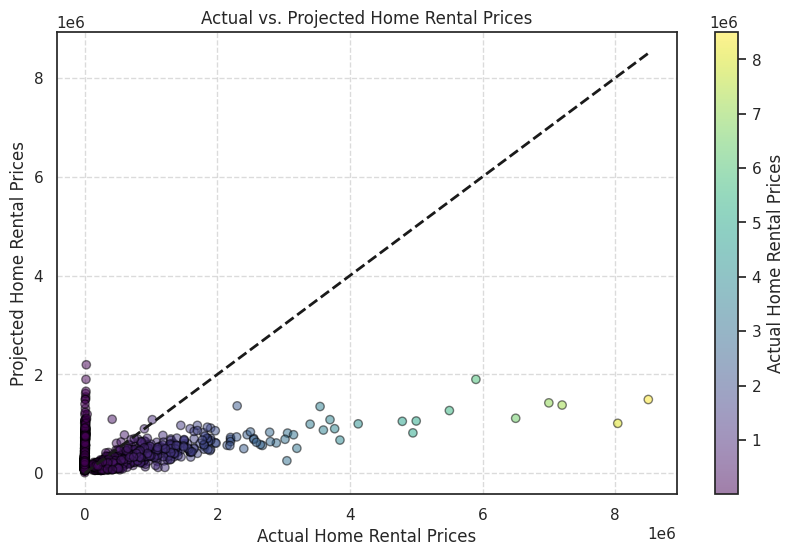

In [14]:
y_pred_lr = model.predict(X_test)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred_lr, alpha=0.5, c=y_test, cmap='viridis', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Projected Home Rental Prices')
plt.xlabel('Actual Home Rental Prices')
plt.ylabel('Projected Home Rental Prices')
plt.colorbar(scatter, label='Actual Home Rental Prices', orientation='vertical')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
